# Loan Approval Prediction: 
### EDA + Logistic Regression, KNN, Decision Tree, & Random Forest Modeling


### Problem Statement:

__About Company__ <br>
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. The customers first apply for a home loan then the company validates the customer eligibility for loan.

__Problem__ <br>
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

#### Dataset Description:

| Variable | Description | 
|------|------|
| Loan_ID | Unique Loan ID | 
| Gender | Male/ Female | 
| Married | Applicant married (Y/N) | 
| Dependents | Number of dependents | 
| Education | Applicant Education (Graduate/ Under Graduate) | 
| Self_Employed | Self employed (Y/N) | 
| ApplicantIncome | Applicant income | 
| CoapplicantIncome | Coapplicant income | 
| LoanAmount | Loan amount in thousands | 
| Loan_Amount_Term | Term of loan in months | 
| Credit_History | credit history meets guidelines | 
| Property_Area | Urban/ Semi Urban/ Rural | 
| Loan_Status | Loan approved (Y/N) | 


In [1]:
# Importing Libraries #
import pandas as pd

train_df = pd.read_csv('C:/Users/marya/Desktop/loan_sanction_train.csv')
train_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### Observations:
1. We can see there are total 13 columns including target variable, all of them are self explanatory. 
2. We also see some missing values, lets take stock of missing columns and what are the possible values for categorical and numerical columns 


In [3]:
#summary statistics
train_df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [4]:
#data summary inluding missing values
print ("Rows     : " , train_df.shape[0])
print ("Columns  : " , train_df.shape[1])
print ("\nFeatures : \n" , train_df.columns.tolist())
print ("\nMissing values : \n", train_df.isnull().sum())
print ("\nUnique values : \n",train_df.nunique())

Rows     :  614
Columns  :  13

Features : 
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Missing values : 
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Unique values : 
 Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64


In [5]:
############ Count number of Categorical and Numerical Columns ######################
train_df = train_df.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)


['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


#### Analyze values assigned to columns 

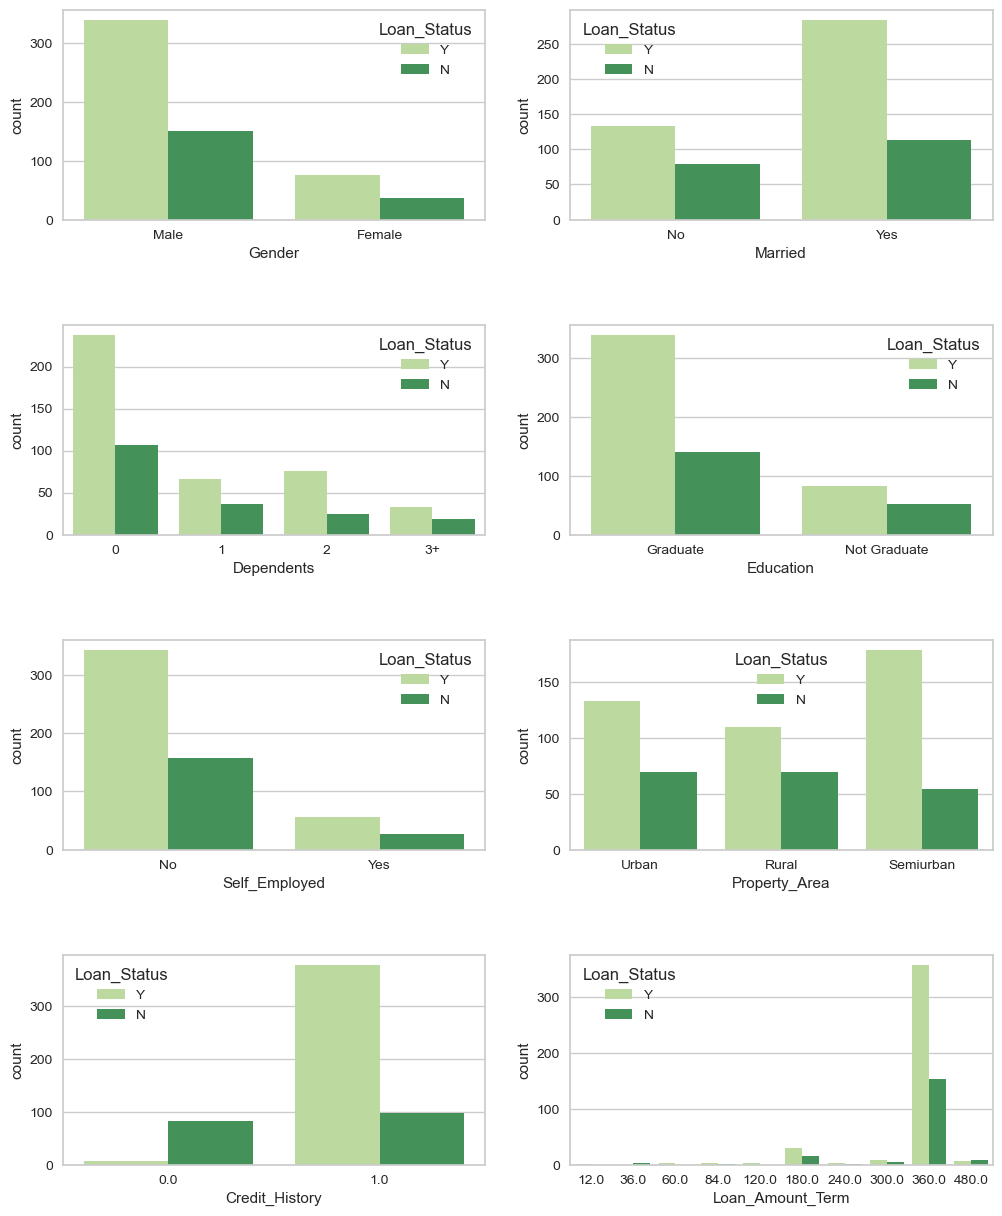

In [50]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col],palette='YlGn')


plt.subplots_adjust(hspace=0.5)

#### Plots above convey following things about the dataset:
1. Loan Approval Status: About 2/3rd of applicants have been granted loan.
2. Sex: There are more Men  than Women (approx. 3x) 
3. Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
4. Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
5. Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
6. Employment: 5/6th of population is not self employed.
7. Property Area: More applicants from Semi-urban and also likely to be granted loans.
8. Applicant with credit history are far more likely to be accepted.
9. Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

Now, let's also analyze Numerical Columns:

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


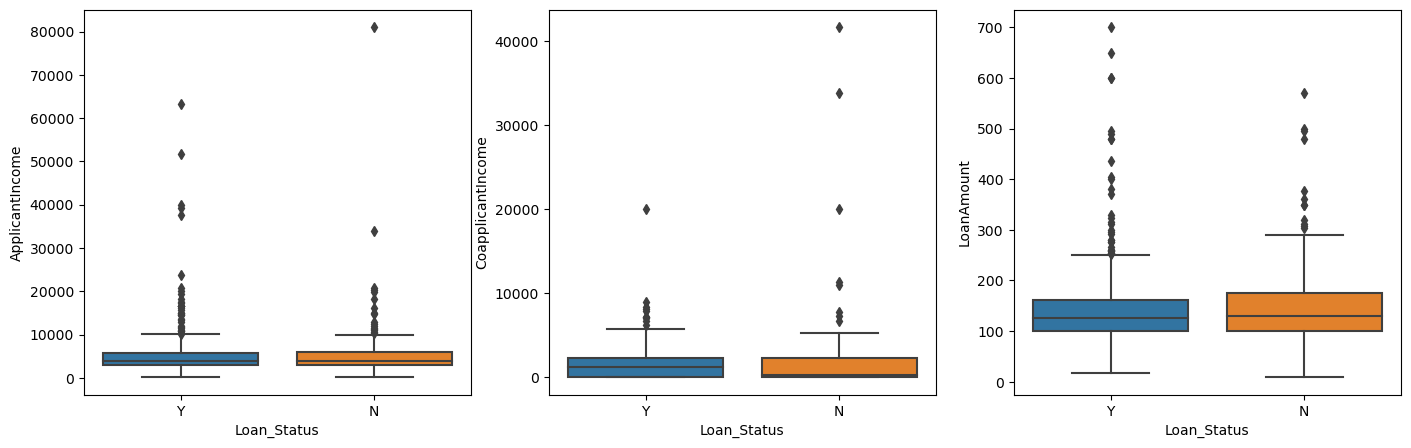

In [7]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=train_df,x='Loan_Status',ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

For Numercical Columns, there is no significant relation to Loan approval status.


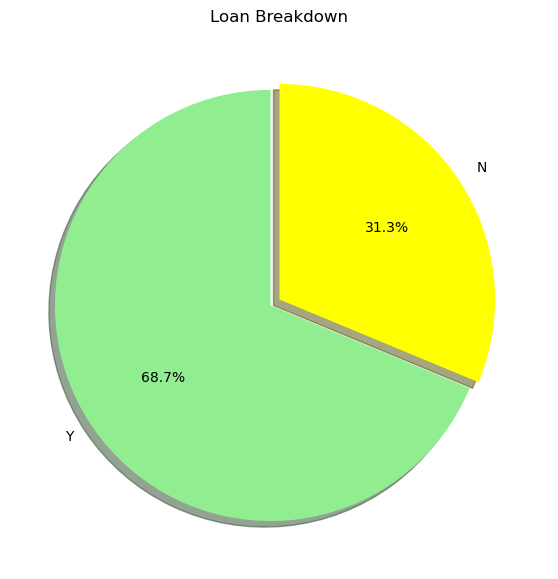

In [8]:
labels =train_df['Loan_Status'].value_counts(sort = True).index
sizes = train_df['Loan_Status'].value_counts(sort = True)

colors = ["lightgreen","yellow"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Loan Breakdown')
plt.show()

68.7% of the loans were approved while 31.3% were not approved

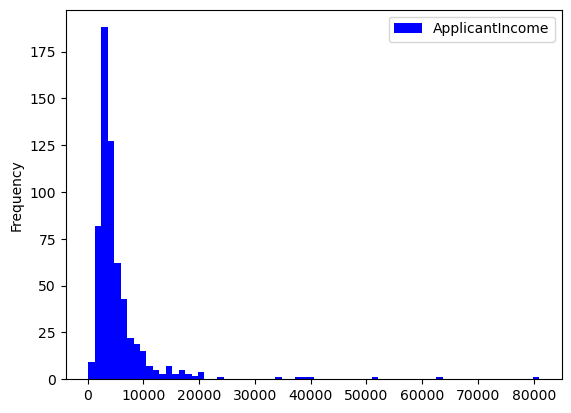

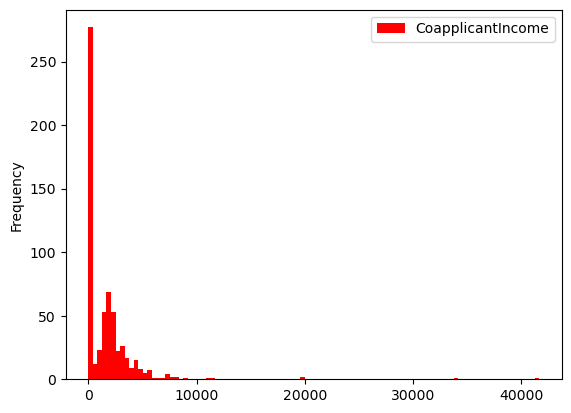

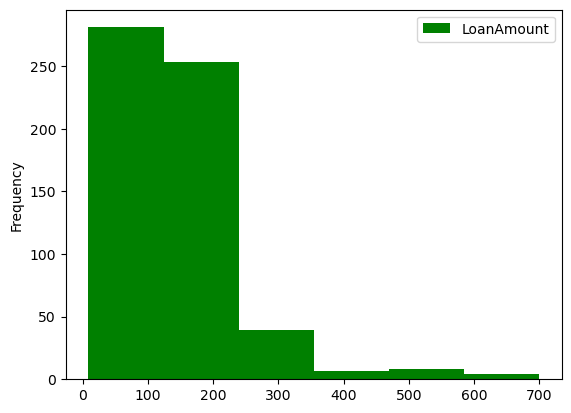

In [9]:
#Varinace Features distribution
train_df.plot(kind="hist", y="ApplicantIncome", bins=70, color="b")
train_df.plot(kind="hist", y="CoapplicantIncome", bins=100, color="r")
train_df.plot(kind="hist", y="LoanAmount", bins=6, color="g")
plt.show()

C:\Users\marya\AppData\Local\Temp\ipykernel_2716\3224628034.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),annot=True);


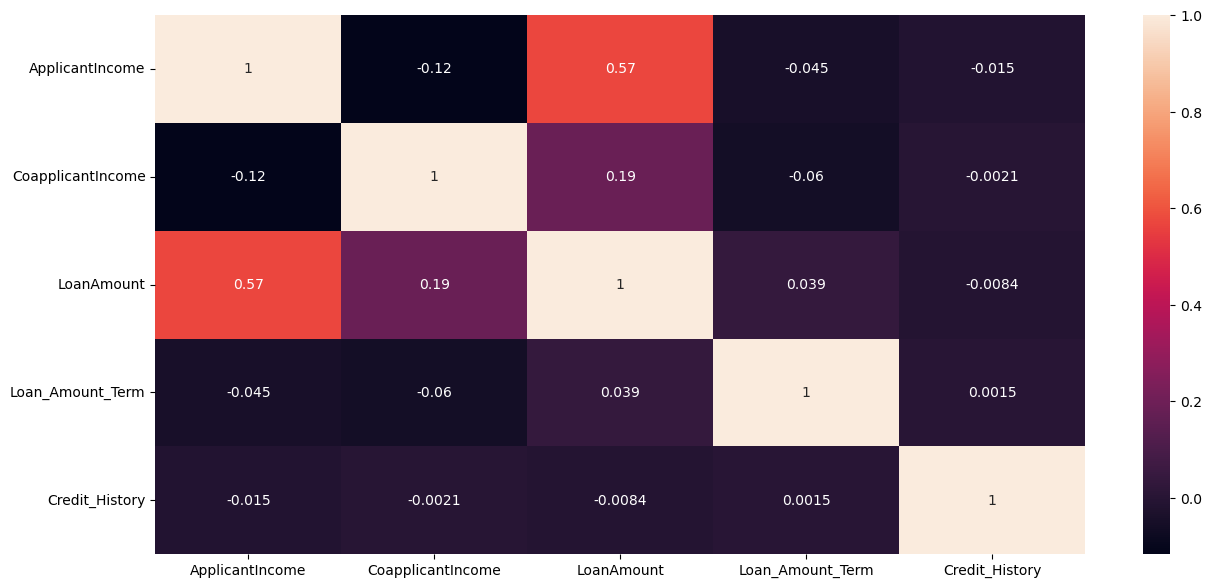

In [10]:
#heatmap correlation
plt.figure(figsize=(15,7))
sns.heatmap(train_df.corr(),annot=True);

### Preprocessing Data:
Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:
1. Encoding Categorical Features.
2. Imputing missing values
3. Scaling/transforming the data

In [11]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


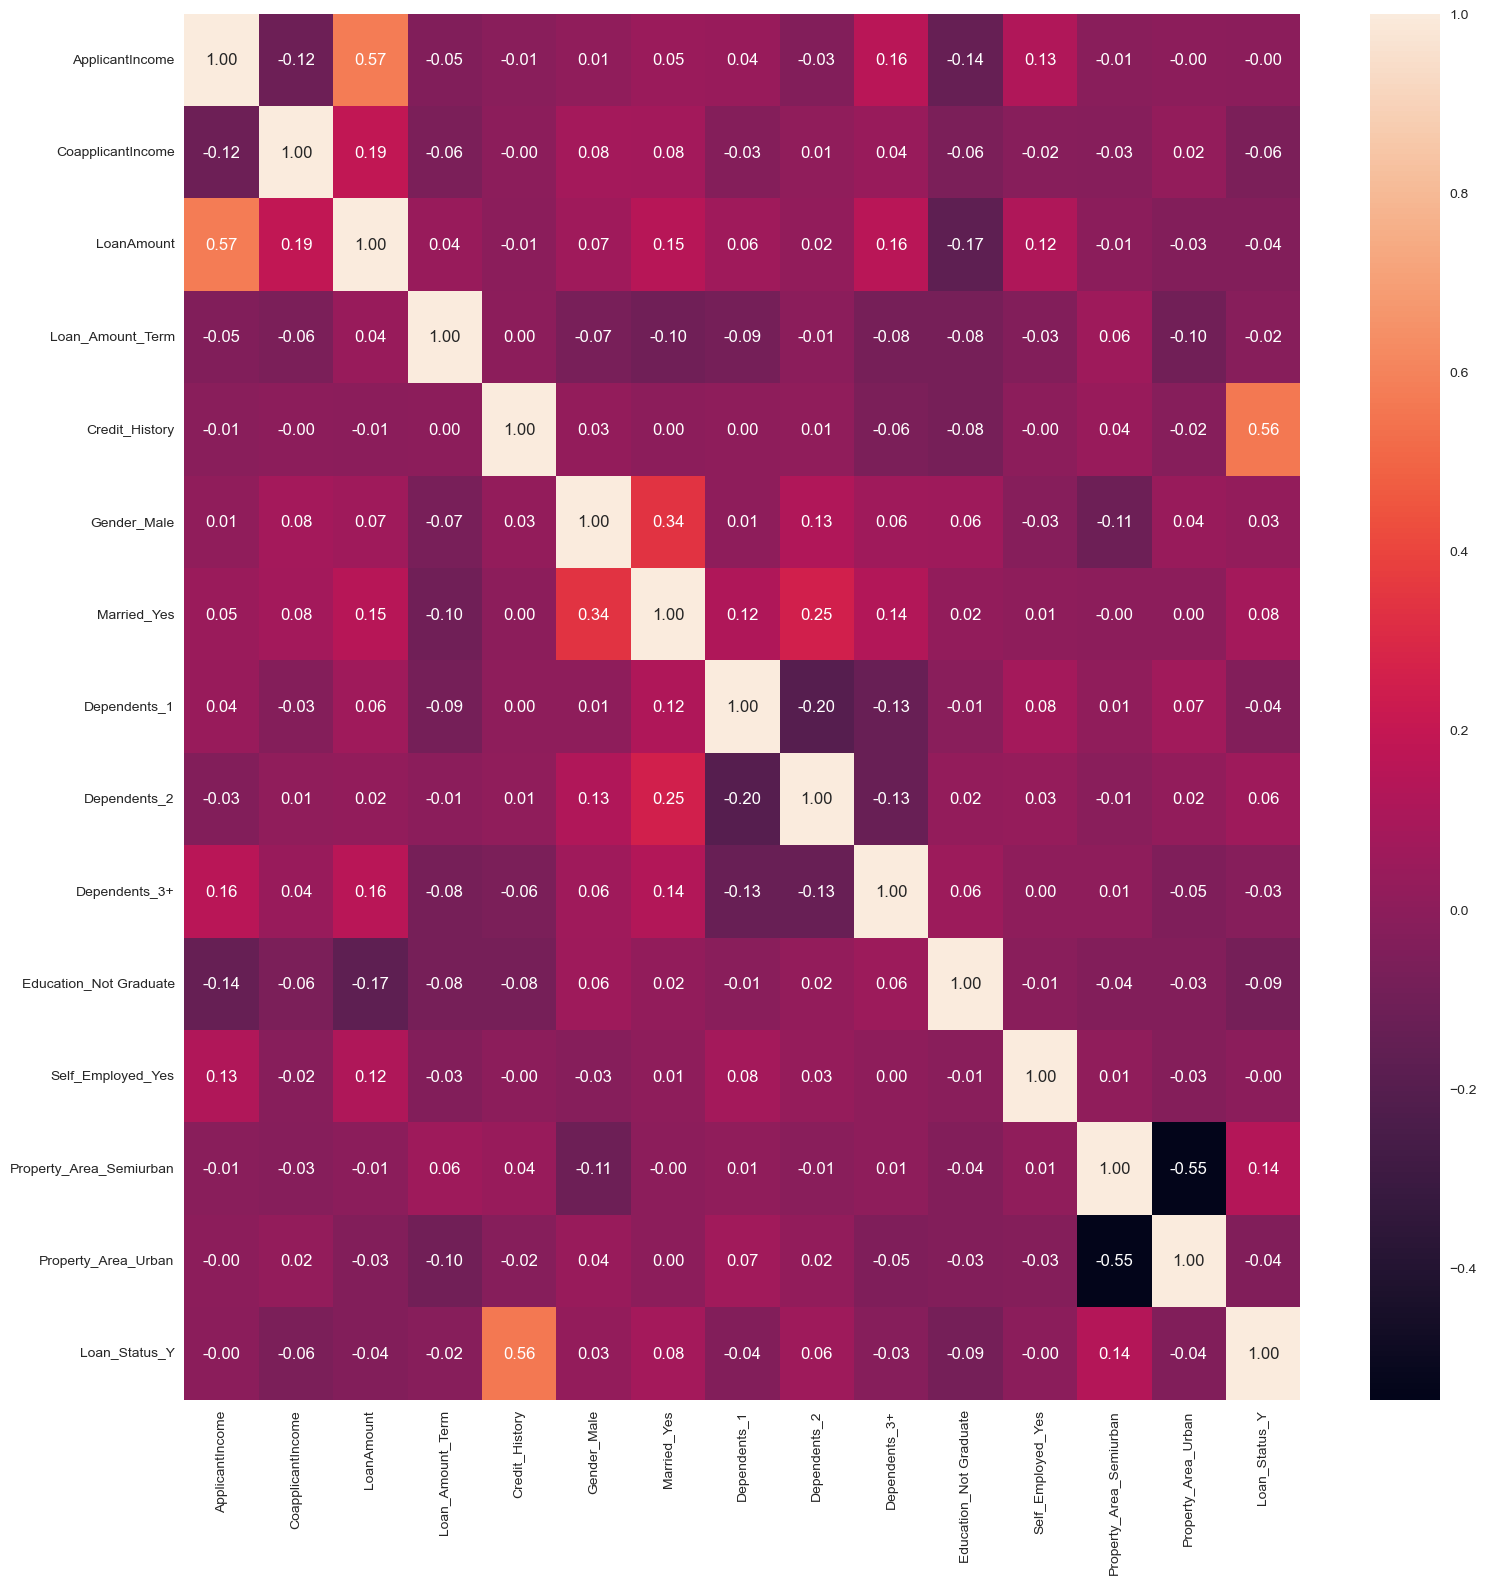

In [51]:
#seeing another correlation after getting dummies
corr = train_df_encoded.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [13]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)


Balancing the data

I will be using SMOTE (Synthetic Minority Over-sampling Technique) to deal with imbalanced data.It helps to alleviate problems caused by class imbalance, such as biased models that tend to favor the majority class due to its larger representation in the dataset by helping to create more representative training data and improving the predictive performance of models on minority class instances.

In [14]:
##!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(X_train_resampled.shape,y_train_resampled.shape)


(674, 14) (674,)


# Model Building

I will be building models for logistic regression, KNN, and Decison Tree.I will use GridSearchCV for hypertuning(to search for the best hyperparameters using cross-validation on the training data.) and then we will focus on model evaluation with some measurements. After all this process we will have our good fit model which provides that model is good fit for the loan prediction.

In [15]:
# For calculating scoring of model prediction
def evaluate_model(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt,yp)
    precision, recall, fbeta,_ = precision_recall_fscore_support(yt, yp, average = 'weighted')
    results_pos['precision'] = precision
    results_pos['recall'] = recall
    results_pos['f1score'] = fbeta
    
    #return results_pos
    metrics = list(results_pos.keys())
    values = list(results_pos.values())
    ax = sns.barplot(x=metrics, y=values, palette='BrBG')
    plt.title('Model Evaluation Metrics')
    plt.ylabel('Value')
    plt.ylim(0, 1)  # Setting y-axis limit for better visualization
    
    for i, v in enumerate(values):
        ax.text(i, v/2, f'{v:.2f}', ha='center', va='center', color='white', fontsize=12)
    
    plt.show()
    
    # Classification report for model prediction
def class_report(yt, yp):
    class_report_df = pd.DataFrame(classification_report(yt, yp, output_dict= True)).transpose()
    return class_report_df.style.background_gradient(cmap = 'BrBG',axis = 0)

# Confusion Matrix for model prediction

def conf_matrix(yt, yp):
    cm = confusion_matrix(yt, yp)
    sns.heatmap(cm, fmt='d', annot =  True, cmap = 'BrBG')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.title('Confusion Matrix')
    plt.show()
    

1. **LOGISTIC REGRESSION MODEL**

Logistic regression is a statistical method used for binary classification tasks, where the target variable (or dependent variable) is categorical and has only two possible outcomes, typically represented as 0 and 1.logistic regression models the probability using the logistic function (also called the sigmoid function). The logistic function maps any real-valued number to the range [0, 1], making it suitable for modeling probabilities

In [16]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Define the grid of hyperparameters to search
params_grid = {
    'penalty': ['l1', 'l2'],
    'C' : [0, 0.2, 0.4, 0.6, 0.8, 1.0],
    'solver' : ['liblinear', 'sag', 'newton_cg', 'lbfgs']
}
#define the model
log_reg = LogisticRegression(max_iter = 1000, random_state = 42)
# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator = log_reg, param_grid = params_grid,
                          cv = 5, scoring = 'f1', n_jobs = -1)
grid_search.fit(X_train_resampled, y_train_resampled)
# Get the best model and its hyperparameters
best_params = grid_search.best_params_
best_params

C:\Users\marya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
140 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marya\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\marya\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\marya\anaconda3\Lib\site-package

{'C': 0.8, 'penalty': 'l1', 'solver': 'liblinear'}

In [17]:
# Logistic Regression with optimal parameters (after hypertuning)
log_reg = LogisticRegression(max_iter = 1000, random_state = 42,
                            C = 0.8, penalty = 'l1', solver = 'liblinear', class_weight='balanced')

log_reg.fit(X_train_resampled, y_train_resampled)

y_pred = log_reg.predict(X_test_imp)

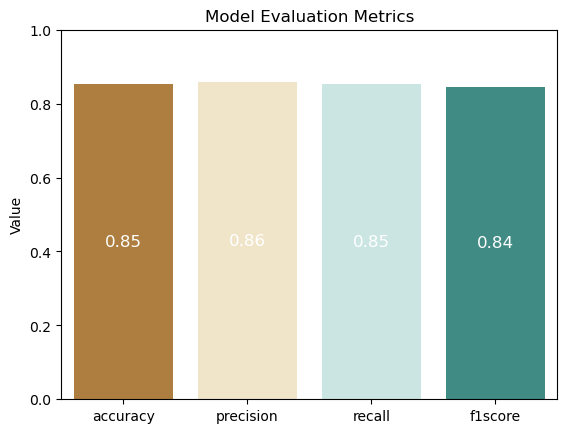

In [18]:
# Model Evaluation report
evaluate_model(y_test, y_pred)

In [19]:
# Classification report
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.884615,0.605263,0.718750,38.000000
1,0.845361,0.964706,0.901099,85.000000
accuracy,0.853659,0.853659,0.853659,0.853659
macro avg,0.864988,0.784985,0.809924,123.000000
weighted avg,0.857488,0.853659,0.844763,123.000000


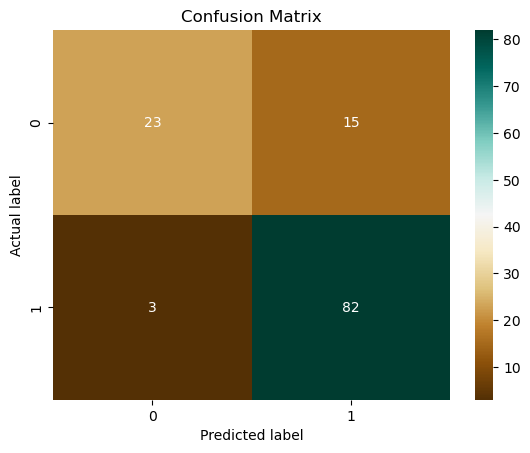

In [20]:
# Confusion Matrix
conf_matrix(y_test, y_pred)

In [21]:
#understanding the feature selection with logistic regression
coef = log_reg.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[1.3498837360117436e-05, 1.5158236072527493e-06, 0.002024011462603655, 0.0013547923804647307, 4.225092286354788, 0.015839398454372267, 0.38098992044056745, 0.19601254310891425, 0.2023522974271375, 0.10065235910976923, 0.18767770543813858, 0.0086353020701911, 0.697276654559888, 0.21701172584215303]


In [22]:
#sorting the impotance of the features 
cols = list(train_df_encoded.columns)
cols.index('Loan_Status_Y')
#== 
#Delete target label 
#== 
del cols[5]
cols
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

Credit_History
Property_Area_Urban
Dependents_1
Loan_Status_Y
Dependents_3+
Dependents_2
Self_Employed_Yes
Education_Not Graduate
Married_Yes
Property_Area_Semiurban
LoanAmount
Loan_Amount_Term
ApplicantIncome
CoapplicantIncome


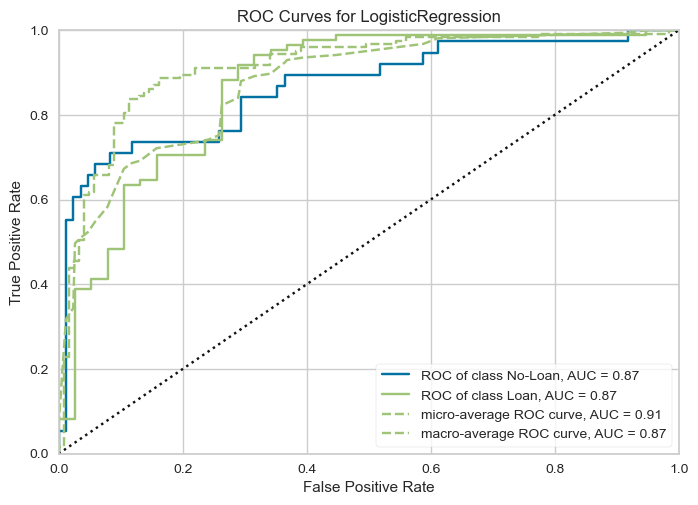

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [23]:
##!pip install yellowbrick
from yellowbrick.classifier import ROCAUC
#ROC curve
visualizer_ROCAUC = ROCAUC(log_reg, classes=["No-Loan", "Loan"])

visualizer_ROCAUC.fit(X_train_resampled, y_train_resampled)       
visualizer_ROCAUC.score(X_test_imp, y_test)        
visualizer_ROCAUC.show()  

2. **KNN MODEL(K nearest neighbor)**

KNN is a non-parametric algorithm.Key parameters of the KNN algorithm include:

    K: The number of nearest neighbors to consider. A higher K value makes the decision boundary smoother but may increase computational complexity.
    Distance Metric: The distance function used to measure the similarity between data points. Common distance metrics include Euclidean distance, Manhattan distance, and cosine similarity.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
# Define the grid of hyperparameters to search
params_grid = {
    'n_neighbors' : [3,5,7,9,11,13,15],
    'metric' : ['minkowski', 'euclidean', 'manhattan'],
    'weights' : ['distance', 'uniform']
}
#define the model
knn = KNeighborsClassifier()
# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator =knn, param_grid = params_grid,
                          cv = 5, scoring = 'f1', n_jobs = -1)
grid_search.fit(X_train_resampled, y_train_resampled)
# Get the best model and its hyperparameters
best_params = grid_search.best_params_
best_params

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

In [25]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan', weights = 'uniform')
knn.fit(X_train_resampled, y_train_resampled)

y_pred = knn.predict(X_test_imp)

In [26]:
knn#to visualize you have to use PCA to reduce dimensionality since we have 10 features

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

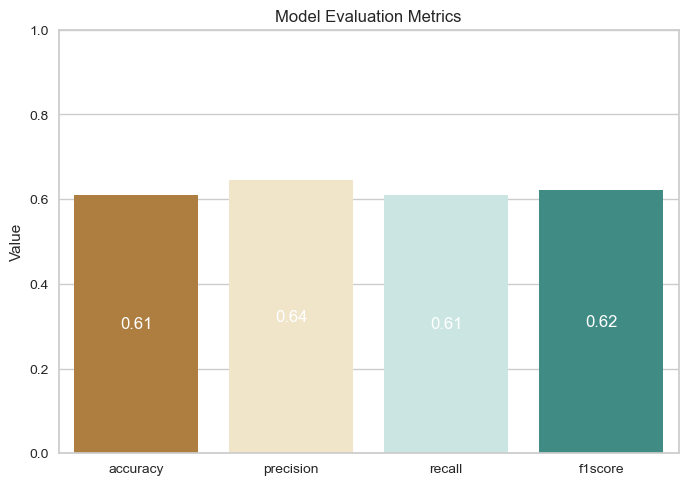

In [27]:
# Model Evaluation report
evaluate_model(y_test, y_pred)

In [28]:
# Classification report
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.400000,0.526316,0.454545,38.000000
1,0.753425,0.647059,0.696203,85.000000
accuracy,0.609756,0.609756,0.609756,0.609756
macro avg,0.576712,0.586687,0.575374,123.000000
weighted avg,0.644237,0.609756,0.621544,123.000000


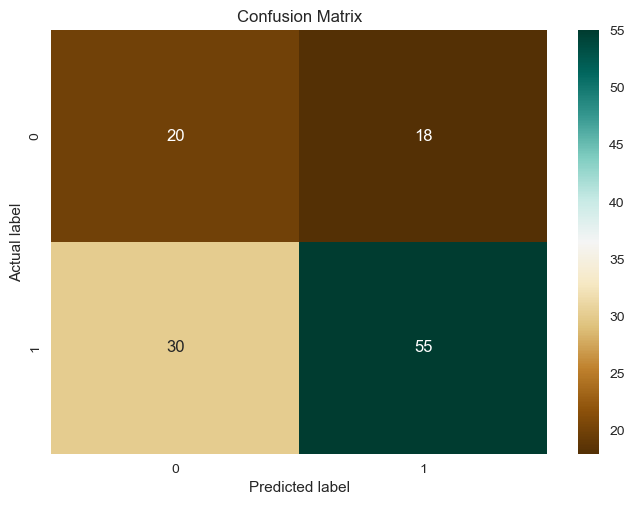

In [29]:
# Confusion Matrix
conf_matrix(y_test, y_pred)

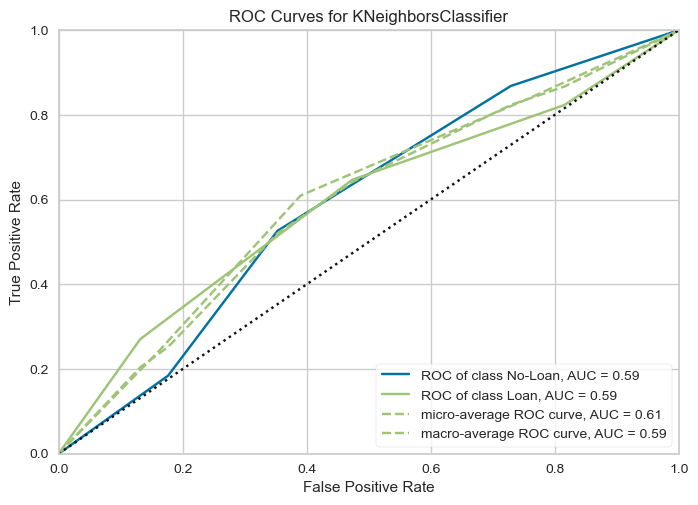

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [30]:
#ROC curve
visualizer_ROCAUC = ROCAUC(knn, classes=["No-Loan", "Loan"])

visualizer_ROCAUC.fit(X_train_resampled, y_train_resampled)       
visualizer_ROCAUC.score(X_test_imp, y_test)        
visualizer_ROCAUC.show()

3. **DECISION TREE MODEL**

A Decision Tree is a supervised machine learning algorithm used for classification. It works by partitioning the feature space into a tree-like structure, where each internal node represents a feature or attribute, each branch represents a decision based on that feature, and each leaf node represents a class label (0 or 1)

In [31]:
from sklearn.tree import DecisionTreeClassifier
# Define the grid of hyperparameters to search
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}
#define the model
model = DecisionTreeClassifier(random_state=42)
# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, n_jobs = -1)
grid_search.fit(X_train_resampled, y_train_resampled)
# Get the best model and its hyperparameters
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2}

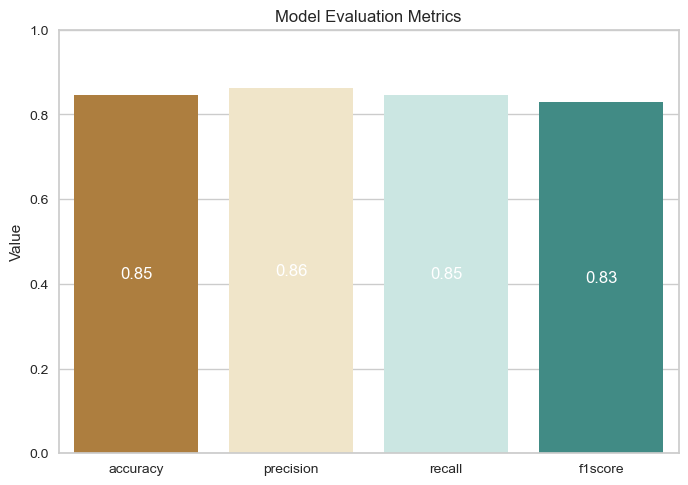

In [32]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2, random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

y_pred = dt.predict(X_test_imp)

evaluate_model(y_test, y_pred)

In [33]:
# Classification report
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.952381,0.526316,0.677966,38.000000
1,0.823529,0.988235,0.898396,85.000000
accuracy,0.845528,0.845528,0.845528,0.845528
macro avg,0.887955,0.757276,0.788181,123.000000
weighted avg,0.863337,0.845528,0.830296,123.000000


In [34]:
dt

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42)

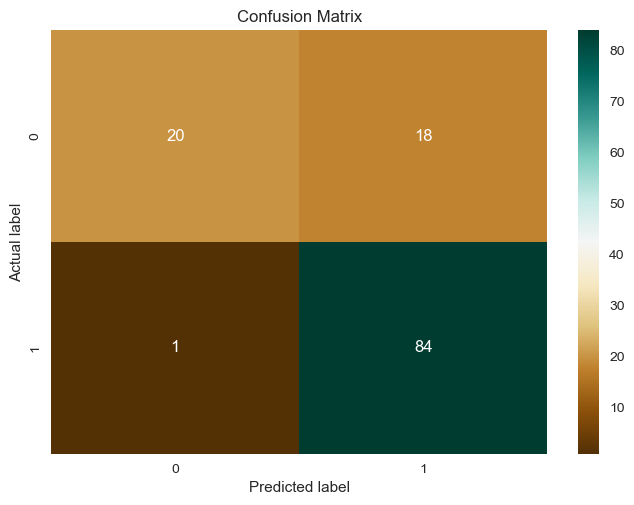

In [35]:
# Confusion Matrix
conf_matrix(y_test, y_pred)

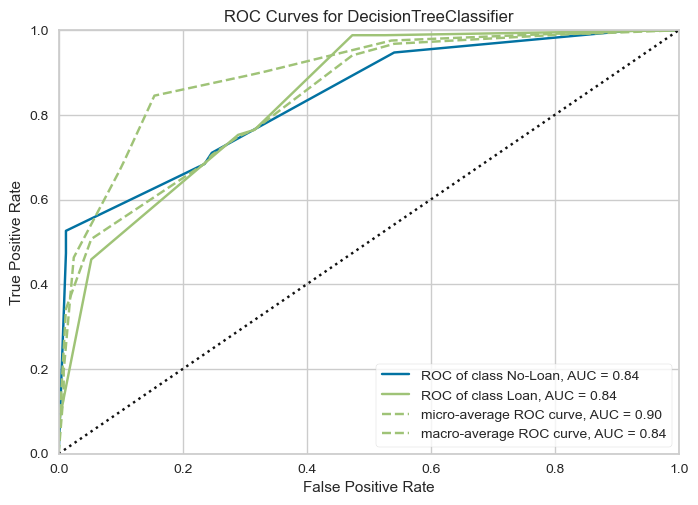

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
#ROC curve
visualizer_ROCAUC = ROCAUC(dt, classes=["No-Loan", "Loan"])

visualizer_ROCAUC.fit(X_train_resampled, y_train_resampled)       
visualizer_ROCAUC.score(X_test_imp, y_test)        
visualizer_ROCAUC.show()

4. **RANDOM FOREST CLASSIFIER**

A common example of bagging is the Random Forest algorithm, which builds multiple decision trees and combines their predictions through averaging or voting.Bagging involves training multiple models independently on different subsets of the training data and then combining their predictions.

In [37]:
from sklearn.ensemble import RandomForestClassifier
# Define the grid of hyperparameters to search
params_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 2, 3, 4, 5]
}
#define the model
model = RandomForestClassifier(random_state=42)
# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, n_jobs = -1)
grid_search.fit(X_train_resampled, y_train_resampled)
# Get the best model and its hyperparameters
best_params = grid_search.best_params_
best_params

{'max_depth': None, 'n_estimators': 400}

C:\Users\marya\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


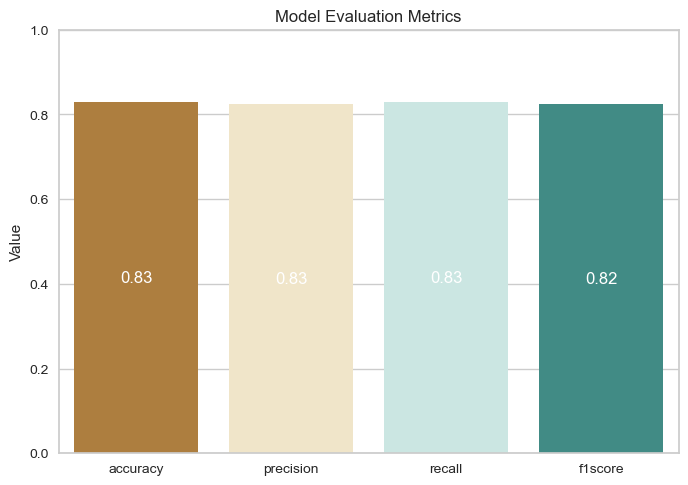

In [38]:
rf = RandomForestClassifier(n_estimators=400 , max_depth=None, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_pred = rf.predict(X_test)

evaluate_model(y_test, y_pred)

In [39]:
rf

RandomForestClassifier(n_estimators=400, random_state=42)

In [40]:
# Classification report
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.774194,0.631579,0.695652,38.000000
1,0.847826,0.917647,0.881356,85.000000
accuracy,0.829268,0.829268,0.829268,0.829268
macro avg,0.811010,0.774613,0.788504,123.000000
weighted avg,0.825078,0.829268,0.823984,123.000000


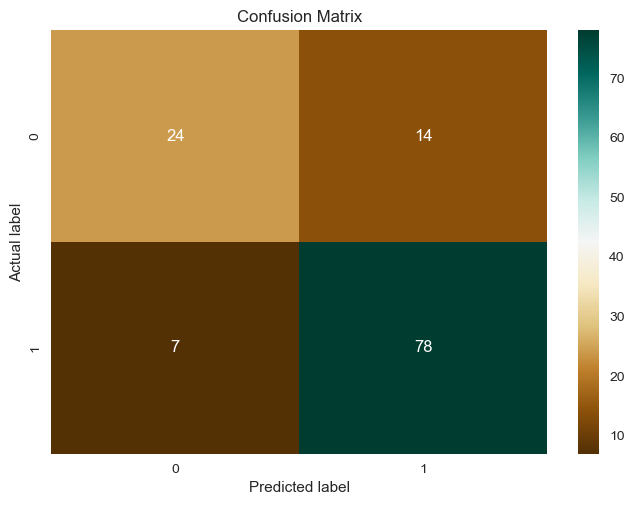

In [41]:
# Confusion Matrix
conf_matrix(y_test, y_pred)

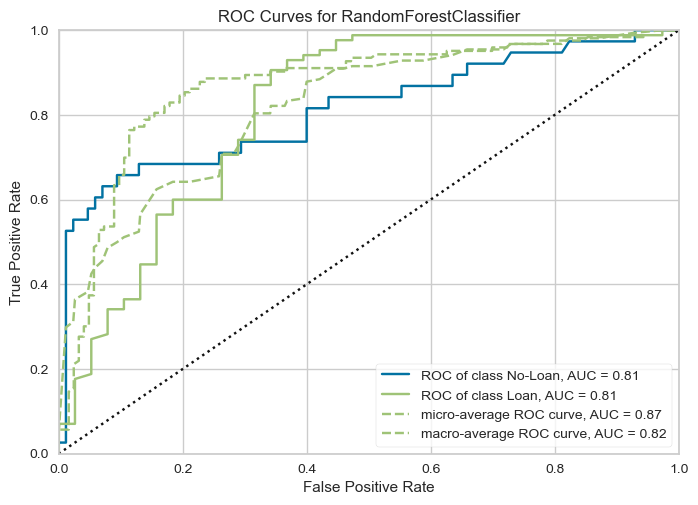

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [42]:
#ROC curve
visualizer_ROCAUC = ROCAUC(rf, classes=["No-Loan", "Loan"])

visualizer_ROCAUC.fit(X_train_resampled, y_train_resampled)       
visualizer_ROCAUC.score(X_test_imp, y_test)        
visualizer_ROCAUC.show()